<a href="https://colab.research.google.com/github/kaiquefreire05/py-pandas-course/blob/main/pandas_course_dio_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com datas

In [ ]:
# Baixando a biblioteca
import pandas as pd

In [ ]:
# Leitura dos arquivos
df1 = pd.read_excel('/content/drive/MyDrive/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/datasets/Fortaleza.xlsx')

In [ ]:
# Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5]) # Colocando um arquivo em baixo de outro

In [ ]:
# Criando a coluna receita, multiplicando as vendas pela quantidade
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# Visualizando os tipos de variáveis armazenadas nas colunas
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:
# Transformando a coluna Data em tipo inteiro
df['Data'] = df['Data'].astype('int64')
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [ ]:
# Transformando a coluna Data em date
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:
# Fazendo um agrupamento por ano da soma das receitas
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118026.29
2019    225713.93
Name: Receita, dtype: float64

In [ ]:
# Criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year
df.sample(5) # Mostrando linhas aleatórias

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
92,Recife,2019-01-01,163.02,981,4,652.08,2019
67,Fortaleza,2019-01-01,43.51,1003,1,43.51,2019
70,Fortaleza,2019-01-01,79.57,1002,5,397.85,2019
238,Natal,2019-01-03,139.64,1035,1,139.64,2019
58,Natal,2018-12-23,272.00,853,3,816.00,2018


In [ ]:
# Extraindo mês e dia da venda
df['Mês_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda
68,Natal,2018-06-22,274.00,852,3,822.00,2018,6,22
20,Natal,2018-06-08,608.00,852,4,2432.00,2018,6,8
32,Fortaleza,2019-01-01,43.33,1004,4,173.32,2019,1,1
62,Recife,2019-01-01,23.04,983,6,138.24,2019,1,1
68,Fortaleza,2019-01-01,85.09,1005,6,510.54,2019,1,1


In [ ]:
# Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calculando a diferença de dias da menor data
df['Diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferenca_dias
42,Fortaleza,2019-01-01,38.71,1004,5,193.55,2019,1,1,365 days
54,Natal,2018-10-03,373.00,852,4,1492.00,2018,10,3,275 days
38,Recife,2019-01-01,104.53,983,4,418.12,2019,1,1,365 days
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,2019,2,13,408 days
165,Natal,2019-01-02,11.54,1037,1,11.54,2019,1,2,366 days


In [ ]:
# Criando a coluna de trimestre de venda
df['Trimestre_venda'] = df['Data'].dt.quarter

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferenca_dias,Trimestre_venda
48,Aracaju,2018-01-01,35.90,1521,8,287.20,2018,1,1,0 days,1
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2019,1,1,365 days,1
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2018,1,1,0 days,1
57,Natal,2019-02-24,425.00,854,4,1700.00,2019,2,24,419 days,1
22,Fortaleza,2019-01-01,150.32,1005,1,150.32,2019,1,1,365 days,1
89,Aracaju,2018-01-01,10.15,1523,7,71.05,2018,1,1,0 days,1
56,Fortaleza,2019-01-01,18.43,1002,1,18.43,2019,1,1,365 days,1
92,Recife,2019-01-01,163.02,981,4,652.08,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
226,Natal,2019-01-02,38.32,1035,2,76.64,2019,1,2,366 days,1


In [ ]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferenca_dias,Trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days,1
139,Fortaleza,2019-03-02,141.16,980,7,988.12,2019,3,2,425 days,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,2019,3,2,425 days,1


In [ ]:
# Filtrando as vendas de 2018 do mês de dezembro
vendas_dezembro_2018 = df.loc[(df['Data'].dt.year == 2018) & (df['Data'].dt.month == 12)]

In [ ]:
vendas_dezembro_2018

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferenca_dias,Trimestre_venda
58,Natal,2018-12-23,272.0,853,3,816.0,2018,12,23,356 days,4


# Visualização de dados

In [ ]:
# Mostrando o id da loja e a quantidade de vendas
df['LojaID'].value_counts(ascending=False)

983     78
1002    60
1005    60
1004    56
982     54
1036    49
1035    44
980     41
1037    41
1522    41
1003    40
1520    39
981     37
852     29
1523    29
854     28
853     26
1034    23
1521    21
Name: LojaID, dtype: int64

<Axes: >

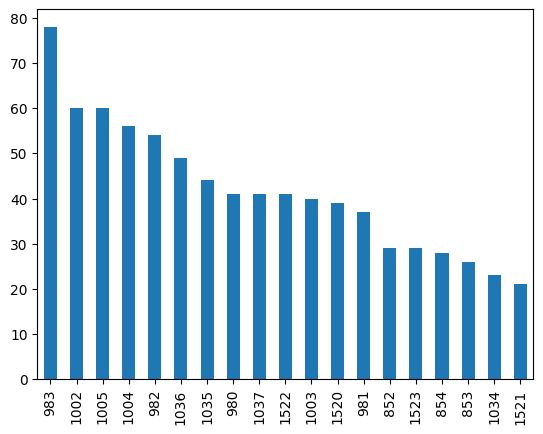

In [ ]:
# Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

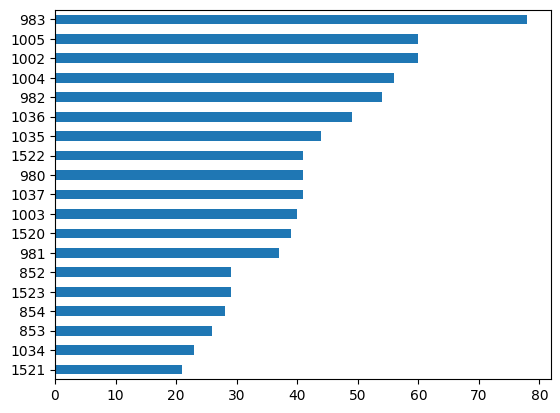

In [ ]:
# Barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh(); # Maior para o menor

<Axes: ylabel='Receita'>

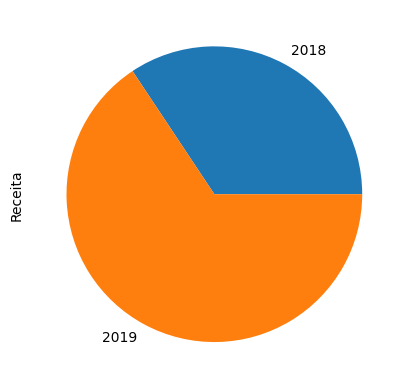

In [ ]:
# Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie() # Mostrando a receita anual divido pelos anos

In [ ]:
# Total vendas por cidade
df['Cidade'].value_counts()

Fortaleza    284
Natal        240
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

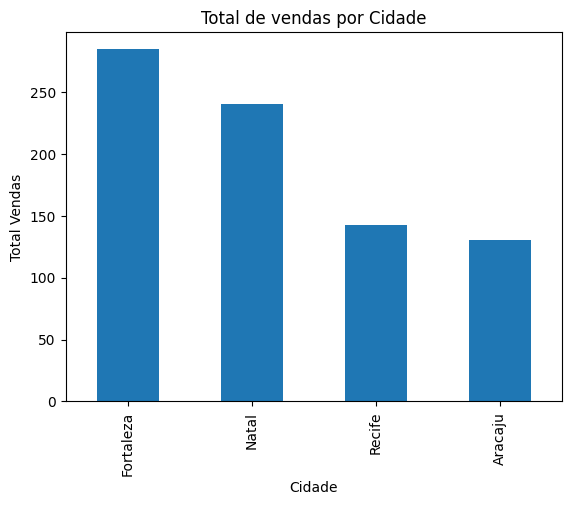

In [ ]:
# Adicionionando um título e um nome para os eixos
import matplotlib.pyplot as plt # Import da biblioteca
df['Cidade'].value_counts().plot.bar(title='Total de vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

Text(0, 0.5, 'Total Vendas')

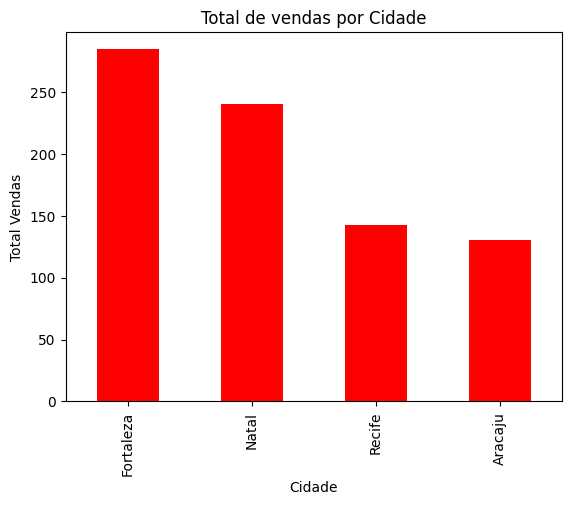

In [ ]:
# Alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total de vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

In [ ]:
# Alterando o estilo
plt.style.use('ggplot')

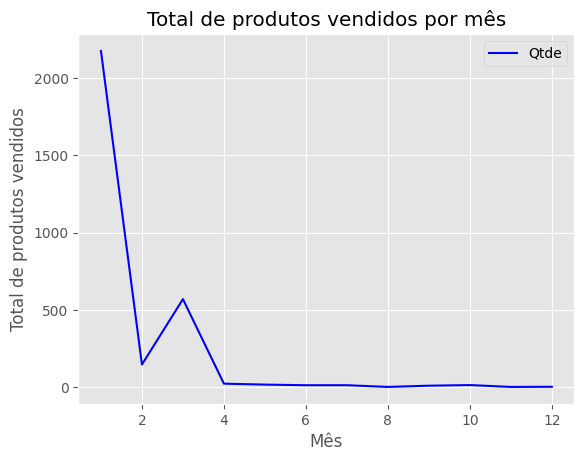

In [ ]:
# Fazendo um agrupamento por mês de venda somando a quantidade de produtos vendidos
df.groupby(df['Mês_Venda'])['Qtde'].sum().plot(title='Total de produtos vendidos por mês', color='blue')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend()

In [ ]:
df.groupby(df['Mês_Venda'])['Qtde'].sum()

Mês_Venda
1     2176
2      147
3      570
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas o ano de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

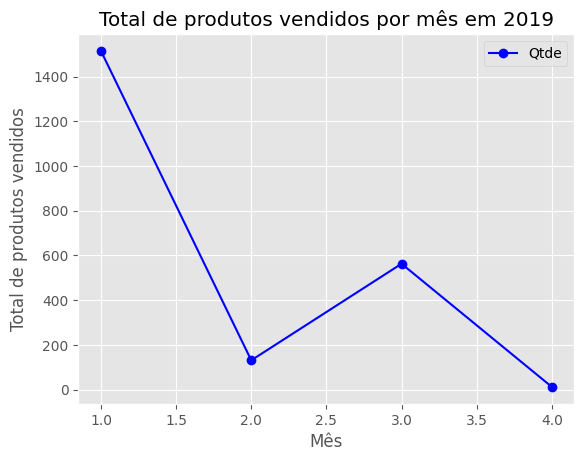

In [ ]:
# Total de produtos vendidos por mês no ano de 2019
df_2019.groupby(df_2019['Mês_Venda'])['Qtde'].sum().plot(marker='o', title='Total de produtos vendidos por mês em 2019', color='blue')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend()

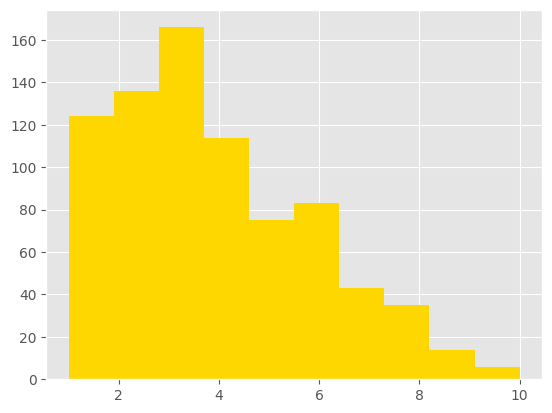

In [ ]:
# Histograma
plt.hist(df['Qtde'], color='gold'); # Colocando ';' ele retira a linha em cima do gráfico

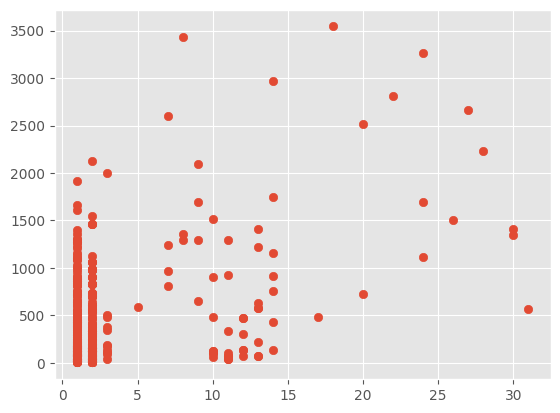

In [ ]:
# Gráfico de dispersão
plt.scatter(x=df_2019['Dia_Venda'], y=df_2019['Receita'])

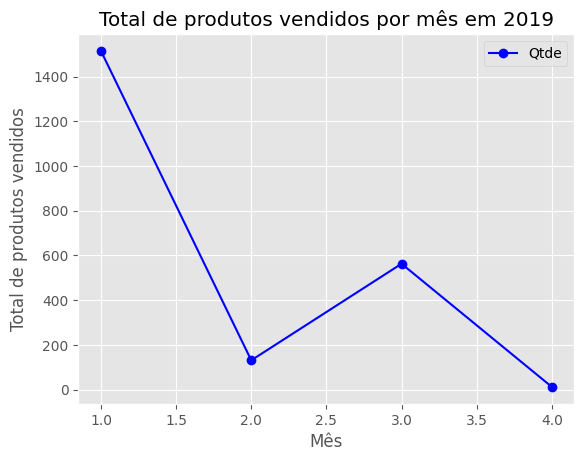

In [ ]:
# Salvando em png
df_2019.groupby(df_2019['Mês_Venda'])['Qtde'].sum().plot(marker='o', title='Total de produtos vendidos por mês em 2019', color='blue')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend()
plt.savefig('Gráfico QTDE x MÊS.png')